In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
N = 10000
p = 0.8

jar = np.random.random_sample(N) > 0.8

In [81]:
draws = 5000
rounds = 10000

In [82]:
with_replacement_losses = []
without_replacement_losses = []

for _ in range(rounds):
    with_replacement = np.random.choice(jar, draws)
    without_replacement = np.random.choice(jar, draws, replace=False)

    with_replacement_seq = with_replacement.cumsum() / np.linspace(1, draws, draws)
    without_replacement_seq = without_replacement.cumsum() / np.linspace(1, draws, draws)

    with_replacement_loss = np.abs(with_replacement_seq - (1 - p))
    without_replacement_loss = np.abs(without_replacement_seq - (1 - p))
    
    with_replacement_losses.append(with_replacement_loss)
    without_replacement_losses.append(without_replacement_loss)

    plt.plot(np.linspace(0, draws, draws), with_replacement_loss, color=(0, 0, 1), alpha=0.05)
    plt.plot(np.linspace(0, draws, draws), without_replacement_loss, color=(0, 1, 0), alpha=0.05)

plt.ylim([0, 0.1])

In [83]:
avg_with_replacement_loss = np.array(with_replacement_losses).mean(axis=0)
avg_without_replacement_loss = np.array(without_replacement_losses).mean(axis=0)

avg_with_replacement_sd = np.array(with_replacement_losses).std(axis=0)
avg_without_replacement_sd = np.array(without_replacement_losses).std(axis=0)

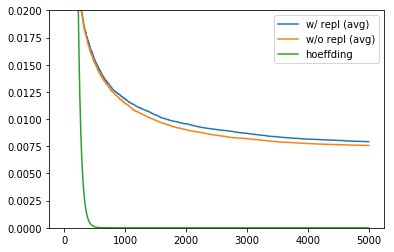

In [95]:
plt.plot(np.linspace(0, draws, draws), avg_with_replacement_loss, label="w/ repl (avg)")
plt.plot(np.linspace(0, draws, draws), avg_without_replacement_loss, label="w/o repl (avg)")
plt.plot(np.linspace(0, draws, draws), [hoeffding(.1, x) for x in np.linspace(0, draws, draws)], label="hoeffding")

plt.ylim([0, 0.02])
plt.legend()

In [91]:
def hoeffding(epsilon, n):
    return 2*np.e**(-2*epsilon**2*n)

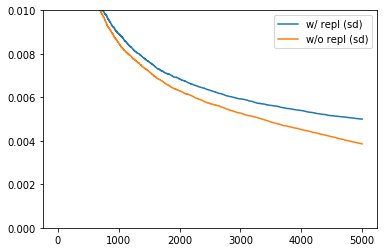

In [86]:
plt.plot(np.linspace(0, draws, draws), avg_with_replacement_sd, label="w/ repl (sd)")
plt.plot(np.linspace(0, draws, draws), avg_without_replacement_sd, label="w/o repl (sd)")
plt.plot(np.linspace(0, draws, draws), avg_without_replacement_sd, label="Hoeffdinger Bound")

plt.ylim([0, 0.01])
plt.legend()

In [87]:
avg_difference = avg_with_replacement_loss - avg_without_replacement_loss

(0, 0.001)

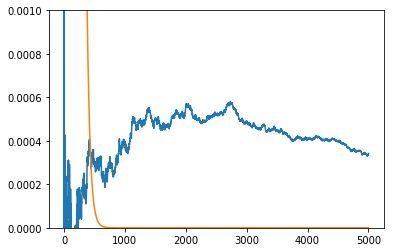

In [96]:
plt.plot(np.linspace(0, draws, draws), avg_difference)
plt.plot(np.linspace(0, draws, draws), [hoeffding(.1, x) for x in np.linspace(0, draws, draws)], label="hoeffding")

plt.ylim([0, 0.001])

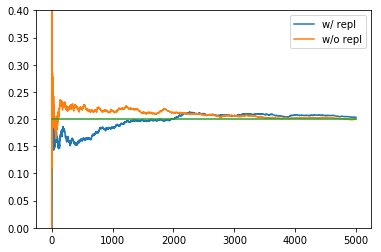

In [44]:
plt.plot(np.linspace(0, draws, draws), with_replacement_seq, label="w/ repl")
plt.plot(np.linspace(0, draws, draws), without_replacement_seq, label="w/o repl")
plt.plot([0, draws], [1-p, 1-p])

plt.ylim([0, 0.4])
plt.legend()